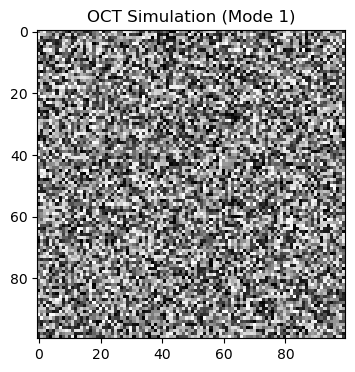

In [1]:
import tkinter as tk
from tkinter import ttk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class SimulationApp:
    def __init__(self, master):
        self.master = master
        master.title("Imaging Simulation")

        # Add buttons
        self.run_oct_button = ttk.Button(master, text="Run OCT (Mode 1)", command=self.run_oct)
        self.run_oct_button.grid(row=0, column=0, padx=10, pady=10)

        self.run_defect_button = ttk.Button(master, text="Run OCT + 2PEM (Mode 2)", command=self.run_mode2)
        self.run_defect_button.grid(row=0, column=1, padx=10, pady=10)

        # Placeholder for plots
        self.figure, self.ax = plt.subplots(figsize=(5, 4))
        self.canvas = FigureCanvasTkAgg(self.figure, master)
        self.canvas.get_tk_widget().grid(row=1, column=0, columnspan=2)

    def run_oct(self):
        # Simulate an OCT scan
        data = np.random.rand(100, 100)  # Example data
        self.ax.clear()
        self.ax.imshow(data, cmap='gray')
        self.ax.set_title("OCT Simulation (Mode 1)")
        self.canvas.draw()

    def run_mode2(self):
        # Simulate OCT + 2PEM
        data = np.random.rand(100, 100)
        defects = data > 0.9  # Highlight defects
        self.ax.clear()
        self.ax.imshow(data, cmap='gray')
        self.ax.imshow(defects, cmap='Reds', alpha=0.5)  # Overlay defects
        self.ax.set_title("OCT + 2PEM (Mode 2)")
        self.canvas.draw()

# Launch the GUI
root = tk.Tk()
app = SimulationApp(root)
root.mainloop()


In [2]:
pip install pyqt5 matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
from PyQt5.QtWidgets import QApplication, QMainWindow, QPushButton, QVBoxLayout, QWidget
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
import matplotlib.pyplot as plt
import numpy as np

class SimulationApp(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("Imaging Simulation")

        # Create central widget
        self.central_widget = QWidget()
        self.setCentralWidget(self.central_widget)

        # Create layout
        self.layout = QVBoxLayout(self.central_widget)

        # Add widgets (buttons and canvas for plots)
        self.init_ui()

    def init_ui(self):
        # Button for Mode 1
        self.oct_button = QPushButton("Run OCT (Mode 1)")
        self.oct_button.clicked.connect(self.run_oct)
        self.layout.addWidget(self.oct_button)

        # Button for Mode 2
        self.mode2_button = QPushButton("Run OCT + 2PEM (Mode 2)")
        self.mode2_button.clicked.connect(self.run_mode2)
        self.layout.addWidget(self.mode2_button)

        # Matplotlib Figure and Canvas
        self.figure, self.ax = plt.subplots()
        self.canvas = FigureCanvas(self.figure)
        self.layout.addWidget(self.canvas)

    def run_oct(self):
        """Simulate OCT (Mode 1)"""
        data = np.random.rand(100, 100)
        self.ax.clear()
        self.ax.imshow(data, cmap='gray')
        self.ax.set_title("OCT Simulation (Mode 1)")
        self.canvas.draw()

    def run_mode2(self):
        """Simulate OCT + 2PEM (Mode 2)"""
        data = np.random.rand(100, 100)
        defects = data > 0.9  # Example defect detection
        self.ax.clear()
        self.ax.imshow(data, cmap='gray')
        self.ax.imshow(defects, cmap='Reds', alpha=0.5)
        self.ax.set_title("OCT + 2PEM (Mode 2)")
        self.canvas.draw()

# Run the application
app = QApplication([])
window = SimulationApp()
window.show()
app.exec_()


from PyQt5.QtWidgets import QSlider, QLabel, QHBoxLayout

class SimulationApp(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("Imaging Simulation with Parameters")
        self.central_widget = QWidget()
        self.setCentralWidget(self.central_widget)

        # Main layout
        self.layout = QVBoxLayout(self.central_widget)

        # Add buttons and canvas
        self.init_ui()

        # Default simulation parameters
        self.threshold = 90  # Defect detection threshold (%)

    def init_ui(self):
        # OCT Button
        self.oct_button = QPushButton("Run OCT (Mode 1)")
        self.oct_button.clicked.connect(self.run_oct)
        self.layout.addWidget(self.oct_button)

        # Mode 2 Button
        self.mode2_button = QPushButton("Run OCT + 2PEM (Mode 2)")
        self.mode2_button.clicked.connect(self.run_mode2)
        self.layout.addWidget(self.mode2_button)

        # Threshold Slider
        slider_layout = QHBoxLayout()
        self.threshold_label = QLabel("Defect Threshold: 90%")
        slider_layout.addWidget(self.threshold_label)

        self.threshold_slider = QSlider()
        self.threshold_slider.setOrientation(Qt.Horizontal)
        self.threshold_slider.setMinimum(50)
        self.threshold_slider.setMaximum(100)
        self.threshold_slider.setValue(self.threshold)
        self.threshold_slider.valueChanged.connect(self.update_threshold)
        slider_layout.addWidget(self.threshold_slider)

        self.layout.addLayout(slider_layout)

        # Matplotlib Canvas
        self.figure, self.ax = plt.subplots()
        self.canvas = FigureCanvas(self.figure)
        self.layout.addWidget(self.canvas)

    def update_threshold(self, value):
        """Update the defect detection threshold."""
        self.threshold = value
        self.threshold_label.setText(f"Defect Threshold: {value}%")

    def run_oct(self):
        """Simulate OCT (Mode 1)"""
        data = np.random.rand(100, 100)
        self.ax.clear()
        self.ax.imshow(data, cmap='gray')
        self.ax.set_title("OCT Simulation (Mode 1)")
        self.canvas.draw()

    def run_mode2(self):
        """Simulate OCT + 2PEM with dynamic defect detection threshold"""
        data = np.random.rand(100, 100)
        defect_threshold = self.threshold / 100.0
        defects = data > defect_threshold  # Defects depend on threshold
        self.ax.clear()
        self.ax.imshow(data, cmap='gray')
        self.ax.imshow(defects, cmap='Reds', alpha=0.5)
        self.ax.set_title(f"OCT + 2PEM (Mode 2, Threshold: {self.threshold}%)")
        self.canvas.draw()


ModuleNotFoundError: No module named 'matplotlib.backends.backend_qt5agg'

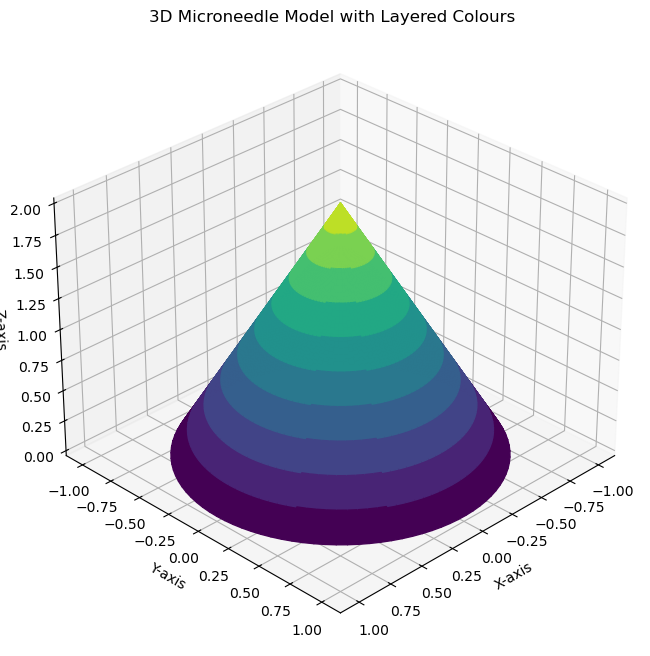

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Define microneedle geometry (cone example)
def create_microneedle(radius, height, num_points):
    theta = np.linspace(0, 2 * np.pi, num_points)  # Angle around the z-axis
    z = np.linspace(0, height, num_points)        # Height of the cone
    r = np.linspace(radius, 0, num_points)        # Radius decreases with height
    
    # Create grid for the cone
    theta, z = np.meshgrid(theta, z)
    r = np.tile(r, (num_points, 1)).T
    
    # Convert to Cartesian coordinates
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y, z

# Step 2: Create microneedle with desired parameters
radius = 1.0       # Base radius
height = 2.0       # Total height
num_points = 100   # Resolution
x, y, z = create_microneedle(radius, height, num_points)

# Step 3: Create layered colours
def get_layer_colours(z, num_layers):
    layer_bounds = np.linspace(np.min(z), np.max(z), num_layers + 1)
    layer_indices = np.digitize(z, layer_bounds) - 1
    colours = plt.cm.viridis(layer_indices / num_layers)  # Gradient from blue to yellow
    return colours

num_layers = 10  # Define the number of layers
colours = get_layer_colours(z, num_layers)

# Step 4: Plot the microneedle
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, facecolors=colours, rstride=1, cstride=1, shade=False)

# Enhance visualisation
ax.set_title("3D Microneedle Model with Layered Colours")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.view_init(elev=30, azim=45)
plt.show()
